# Dataset: A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

Columns:

RowNumber

CustomerId

Surname

CreditScore

Geography

Gender

Age

Tenure

Balance

NumOfProducts

HasCrCard

IsActiveMember

EstimatedSalary

Exited

# In this notebook, we will predict customer churn using Artificial Neural Network (ANN).

Content:

Load and Check Data

Data Visualization

Feature Engineering

Age -> Categorical Age

CreditScore -> Categorical CreditScore

Modeling

Train - Test Split

Standardization

Artificial Neural Network (ANN)

# Problem Statement
The objective is to analyze and predict customer churn in a banking dataset. The dataset contains various features for each customer, including credit score, geography, gender, age, account balance, and other relevant attributes. The target variable is 'Exited,' indicating whether a customer has churned (1) or not (0). The goal is to develop a predictive model that can identify factors contributing to customer churn and accurately predict which customers are likely to exit the bank. This model could help the bank take proactive measures to retain customers and improve overall customer satisfaction

In [1]:
import tensorflow as ts

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("Churn_Modelling.csv")

In [5]:
df.shape

(10000, 14)

In [6]:
df.size

140000

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.isnull().sum()*100/len(df)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3110,3111,15707596,Chung,546,Germany,Female,74,8,114888.74,2,1,1,66732.63,1
478,479,15677538,Nwokike,569,France,Male,38,7,0.00,1,1,1,108469.20,0
2282,2283,15642787,Ijendu,572,France,Male,37,1,133043.66,1,0,0,111243.09,0
534,535,15567832,Shih,550,France,Female,40,7,114354.95,1,1,0,54018.93,0
365,366,15613085,Ibrahimova,628,Spain,Female,33,3,0.00,1,1,1,188193.25,0
6963,6964,15595447,Tuan,613,Spain,Male,39,8,118201.41,1,1,0,23315.59,0
7334,7335,15759133,Vaguine,616,France,Male,18,6,0.00,2,1,1,27308.58,0
566,567,15651674,Billson,438,Spain,Female,54,2,0.00,1,0,0,191763.07,1
321,322,15678910,Ts'ai,680,France,Female,30,8,141441.75,1,1,1,16278.97,0
4584,4585,15589666,Sorokina,595,France,Female,39,9,136422.41,1,1,1,151757.81,0


In [14]:
round(df.describe(),2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [18]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [19]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [20]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [21]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Splitting The dataset dependant and independant**

In [23]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
# getting dependant and indepdant features

x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [25]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [26]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [27]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [28]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [29]:
x['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [30]:
x['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

# Feature Engineering

In [31]:
# Converting catgorical varibles into dummy variables
geography=pd.get_dummies(x['Geography'],drop_first=True).astype(int)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [32]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
# Similarly we do for gender column
gender=pd.get_dummies(x['Gender'],drop_first=True).astype(int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [34]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [35]:
# Now we dropping those columns not important geopgraphy and gender
x=x.drop(['Geography','Gender'],axis=1)

In [36]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [37]:
# Now we concat the varibles that we had applyed one hot encoding

x=pd.concat([x,geography,gender],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [38]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
X_train.shape

(8000, 11)

In [42]:
y_train.shape

(8000,)

In [43]:
X_test.shape

(2000, 11)

In [44]:
y_test.shape

(2000,)

In [45]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [46]:
# Applying the scaling

from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()

In [48]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [49]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [50]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [52]:
# Initilize the ANN
classifier=Sequential()

In [53]:
x.shape

(10000, 11)

In [54]:
# Adding thr input layer
classifier.add(Dense(units=11,activation='relu'))

In [55]:
# first hidden layers
classifier.add(Dense(units=7,activation='relu'))

# Adding the dropout layer
classifier.add(Dropout(0.2))

In [56]:
# secoond hidden layer
classifier.add(Dense(units=6,activation='relu'))

# Adding the dropout layer
classifier.add(Dropout(0.3))

In [57]:
# Adding output layer
classifier.add(Dense(1,activation='sigmoid'))

# Now Train the neural network

In [58]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
# By default learning rate used 0.01

# If we ahve to use our learning rate
# import tensorflow
# opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [60]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

8000 8000
2000 2000


# Early Stopping

'''
Early Stopping When the accuracy of model is not increasing then then automatically training of the neural network will stop
'''

In [61]:
# Early Stopping

'''
Early Stopping When the accuracy of model is not increasing then then automatically training of the neural network will stop
'''
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [62]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000


536/536 [==============================] - 7s 7ms/step - loss: 0.5566 - accuracy: 0.7610 - val_loss: 0.4704 - val_accuracy: 0.7959
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4812 - accuracy: 0.7959 - val_loss: 0.4470 - val_accuracy: 0.7989
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4583 - accuracy: 0.8022 - val_loss: 0.4389 - val_accuracy: 0.8001
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4457 - accuracy: 0.8082 - val_loss: 0.4342 - val_accuracy: 0.7993
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4371 - accuracy: 0.8091 - val_loss: 0.4301 - val_accuracy: 0.8023
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4358 - accuracy: 0.8080 - val_loss: 0.4238 - val_accuracy: 0.8084
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4256 - accuracy: 0.8151 - val_loss: 0.4156 - val_accurac

In [63]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

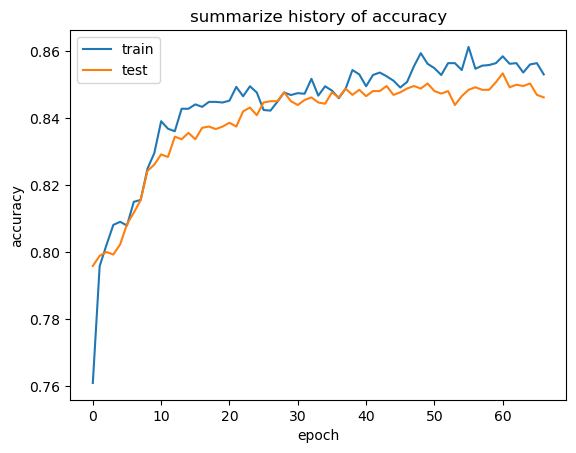

In [64]:
# Plotting the summarize history of accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('summarize history of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

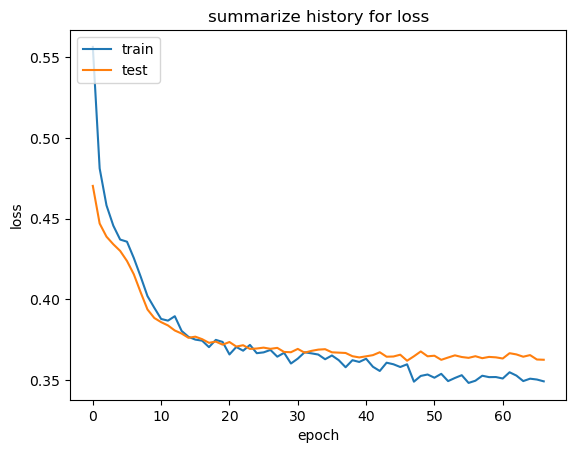

In [65]:
# Plotting the summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('summarize history for loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [66]:
# Making the prediction of model
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [67]:
# Creating Confusion matrix

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[1544,   51],
       [ 219,  186]], dtype=int64)

In [68]:
# Calcualte the accuracy 
from sklearn.metrics import accuracy_score

score=accuracy_score(y_test,y_pred)

In [69]:
score

0.865

In [70]:
# Get the weights
classifier.get_weights()

[array([[-5.58023639e-02,  1.38267070e-01, -1.52185634e-01,
         -1.83997914e-01,  9.19819158e-03, -3.75556141e-01,
         -3.90412956e-02, -1.31724775e-01,  2.94589996e-02,
         -1.61395743e-02, -2.57306937e-02],
        [-4.67921168e-01,  2.36834824e-01,  3.10872674e-01,
          2.95204192e-01,  3.30390185e-02,  3.05185355e-02,
          1.88172057e-01,  3.74053359e-01,  6.72855556e-01,
         -1.02417433e+00,  7.27259159e-01],
        [ 1.03498250e-01,  4.81781244e-01,  2.28105754e-01,
          2.82826453e-01,  1.07418634e-01, -2.61035077e-02,
          5.26691265e-02, -1.27803400e-01,  3.66898999e-03,
         -1.16921030e-01,  3.86216566e-02],
        [ 1.21169709e-01, -4.33034182e-01, -9.43485439e-01,
         -4.51148897e-01, -7.91559577e-01,  2.89525181e-01,
          1.35443017e-01, -8.62448066e-02,  2.89127827e-01,
         -1.40576988e-01, -2.48416495e-02],
        [ 7.59442508e-01, -4.21871394e-02, -8.71464193e-01,
         -3.00828815e-02,  2.89329082e-01,  